In [16]:
import pandas as pd  
import numpy as np 
from collections import Counter
import matplotlib.pyplot as plt 

# 加载数据

In [42]:
data= pd.read_csv('studenmunds_restaurants.csv')
data

,sales,competition,population,income
0,107919,3,65044,13240
1,118866,5,101376,22554
2,98579,7,124989,16916
3,122015,2,55249,20967
4,152827,3,73775,19576
5,91259,5,48484,15039
6,123550,8,138809,21857
7,160931,2,50244,26435
8,98496,6,104300,24024
9,108052,2,37852,14987


# 对数据进行分析

### 画出销售总额频率直方图

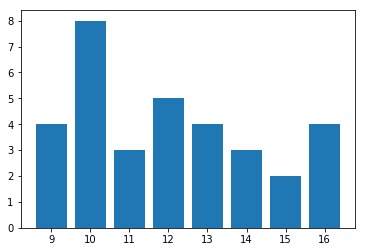

In [28]:
sales = np.array(data['sales']/10000,dtype='int')
salesCounter = Counter(sales)

plt.bar(salesCounter.keys(), salesCounter.values(),align='center')
plt.show()

### 低收入餐馆比例图

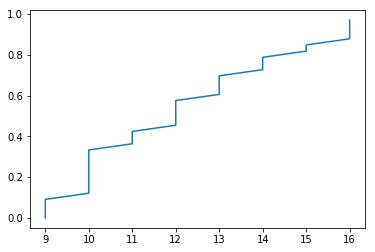

In [49]:
plt.plot(np.sort(sales), np.arange(0,len(sales))/len(sales))
# np.sort(sales)



### 四个变量之间的两两关系点图

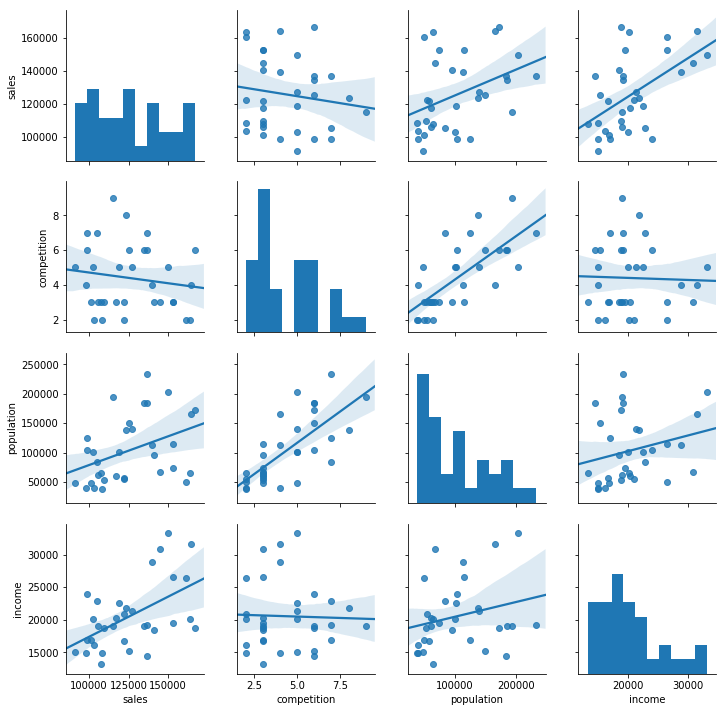

In [56]:
import seaborn as sns
sns.pairplot(data, kind="reg")

#### 四个变量之间的两两关系系数

In [54]:
data.corr()

,sales,competition,population,income
sales,1.000000,-0.144225,0.392568,0.537022
competition,-0.144225,1.000000,0.726251,-0.031534
population,0.392568,0.726251,1.000000,0.245198
income,0.537022,-0.031534,0.245198,1.000000


# 线性模型及分析

In [101]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [115]:
x = pd.DataFrame() 
x['competition'] = data['competition']
x['population'] = data['population']
x['income'] = data['income']
x = np.array(x)

In [116]:
y = data['sales'].reshape(-1,1)

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


### 训练模型

In [121]:
lin_reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [113]:
lin_reg.score(x,y)
lin_reg.coef_

array([[-9.07467440e+03,  3.54668367e-01,  1.28792339e+00]])

### 通过模型预测

In [119]:
x_predict = [[2, 50000, 25000],[3,200000,22000],[5,220000,19000]]

lin_reg.predict(x_predict)

array([[133974.5820268 ],
       [174236.39257042],
       [159316.64094786]])